### 1. Importing packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from textblob import TextBlob
%matplotlib inline
import seaborn as sns

In [ ]:
# reading and preview 'cleaned_data.csv'
tweets = pd.read_csv('cleaned_data.csv')
tweets = tweets.iloc[:, [0, 1, 4]]
tweets.head()

,id,date,cleaned_tweet
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands su...
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply c...
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two...


In [ ]:
# looking at tesla_tweets data types

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113741 entries, 0 to 113740
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             113741 non-null  int64 
 1   date           113741 non-null  object
 2   cleaned_tweet  109112 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


In [ ]:
# converting date_time column into datetime stamp

tweets.date = pd.to_datetime(tweets.date)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113741 entries, 0 to 113740
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             113741 non-null  int64         
 1   date           113741 non-null  datetime64[ns]
 2   cleaned_tweet  109112 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.6+ MB


In [ ]:
# checking for null values

tweets.isnull().sum()

id                  0
date                0
cleaned_tweet    4629
dtype: int64

In [ ]:
# dropping null values

tweets = tweets.dropna()

### 2. Calculating sentiment score with TextBlob

In [ ]:
# using TextBlob to get sentiment scores

tweets['sentiment'] = tweets.apply(lambda row: TextBlob(row.cleaned_tweet).sentiment[0], axis=1)
tweets.head()

,id,date,cleaned_tweet,sentiment
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands su...,0.15
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve,-0.20
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply c...,0.20
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan,0.00
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two...,0.75


In [ ]:
# previewing how sentiment scores differ on different tweets

pd.options.display.max_colwidth = 300
random_subset = tweets.sample(n=10)
random_subset = random_subset.drop(columns=['id', 'date'])
random_subset.rename(columns={'tweet':'Original Tweet'})
random_subset = random_subset.rename(columns={'tweet': 'Original Tweet', 'cleaned_tweet': 'Cleaned Tweet', 'sentiment':'TextBlob Sentiment'})
random_subset.head(10)

,Cleaned Tweet,TextBlob Sentiment
65657,gwestr delayslater fact greg sell bit annoy,0.000000
1321,hansniederberg year gf germany take miracle still certain happen,0.214286
109614,crackheadbob garyblack wrong people call index inefficient last year arkinvest others own index since pandemic since unload today greener pasture index garbage tho,0.033333
66565,asset see jump tweet eth,0.000000
73896,still time get apple appl stocksplit sure start robinhood account,0.500000
53506,aapl msft amzn fb nflx googl amd zm bynd ba baba dal wmt hd spy ba nvda g cost,0.000000
71677,brianlantier dougkass realmoney right chanos use bound investment portfolio exposure percentages control risk salt away fractional reward example fund short shs trim portfolio hold shs today thereabouts,0.142857
113643,look nice,0.600000
45518,trendspider,0.000000
60649,inmb imv warzonescript top favorite among client ribbon wil populare identify important support resistance zone avail tradingview tos,0.466667


In [ ]:
tweets.shape

(109112, 4)

### 3. Frequency analysis

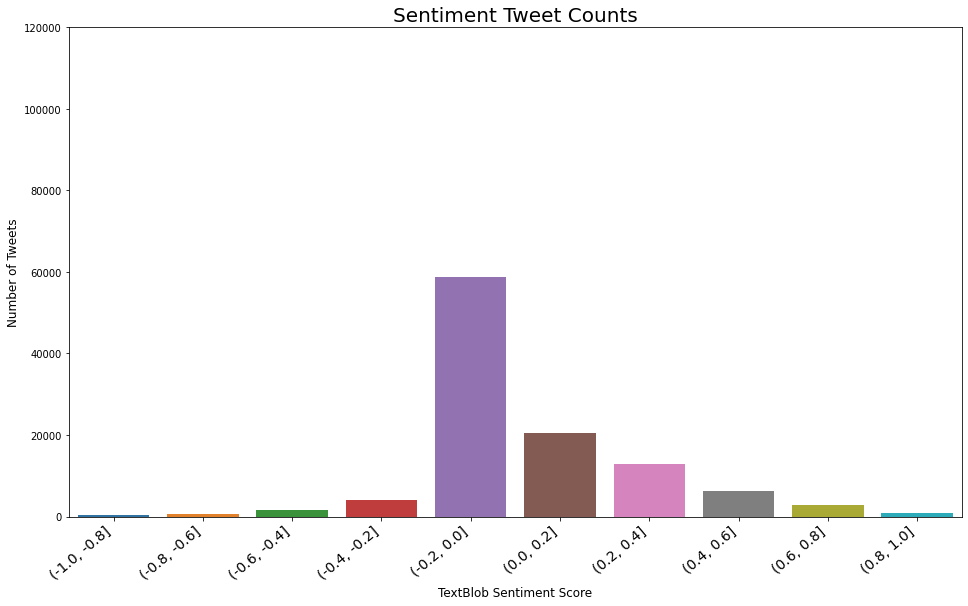

In [ ]:
# viewing count of tweets for binned sentiment

bins = [-1.0, -0.8, -0.6, -.4, -.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
tweets['binned'] = pd.cut(tweets['sentiment'], bins)
plt.figure(figsize=(16,9))
ax = sns.countplot(x=tweets['binned'])
ax.set_ylabel('Number of Tweets', fontsize=12)
ax.set_xlabel('TextBlob Sentiment Score', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=14)
ax.set_title("Sentiment Tweet Counts", fontsize=20)
ax.set_ylim(0, 120000)
plt.show()

### 4. Calculating daily sentiment

In [ ]:
daily_sentiment = tweets[['date', 'sentiment']]
daily_sentiment.head()

,date,sentiment
0,2020-01-02,0.15
1,2020-01-02,-0.20
2,2020-01-02,0.20
3,2020-01-02,0.00
4,2020-01-02,0.75


In [ ]:
# daily average sentiment scores
daily_sentiment = daily_sentiment.resample('D', on='date').mean()
daily_sentiment.head()

,sentiment
date,
2020-01-01,0.099938
2020-01-02,0.111398
2020-01-03,0.073760
2020-01-04,0.083606
2020-01-05,0.086658


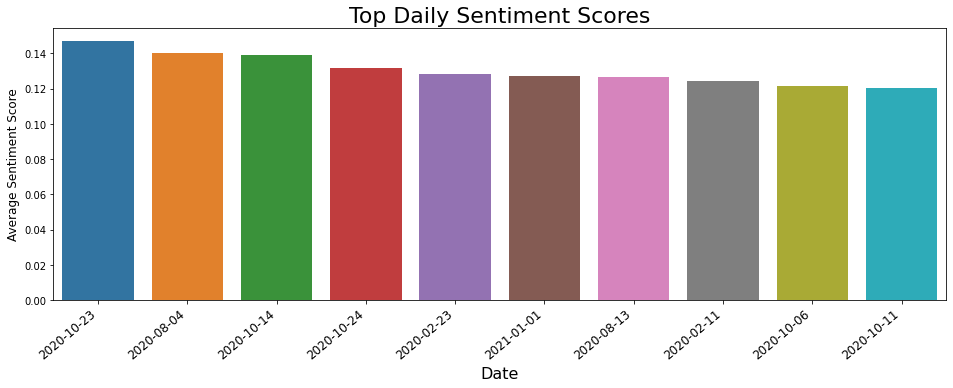

In [ ]:
# finding the days with the highest sentiment_2

freq_df = daily_sentiment.nlargest(columns="sentiment", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment'])
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title('Top Daily Sentiment Scores', fontsize=22)
plt.show()

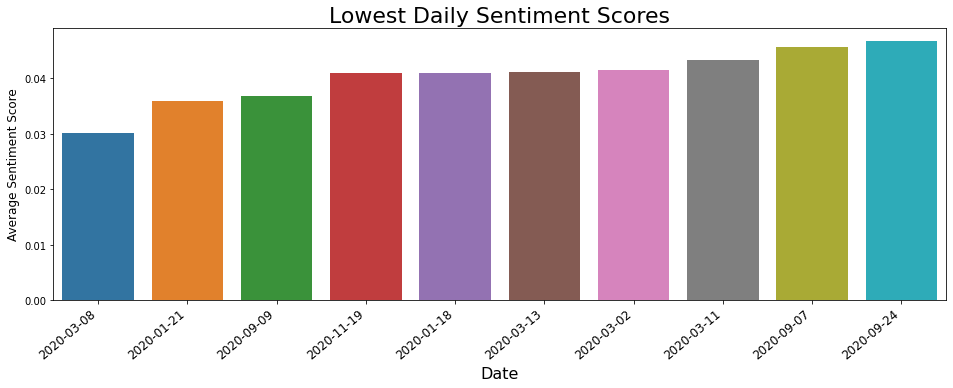

In [ ]:
freq_df = daily_sentiment.nsmallest(columns="sentiment", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment'])
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title('Lowest Daily Sentiment Scores', fontsize=22)

plt.show()

### 5. Removing tweets with sentiment scores of 0

In [ ]:
remove_s1_0 = tweets.copy()
remove_s1_0.head()

,id,date,cleaned_tweet,sentiment,binned
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands sux combine obviously order magnitude,0.15,"(0.0, 0.2]"
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve,-0.20,"(-0.4, -0.2]"
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply charts never short lol,0.20,"(0.0, 0.2]"
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan,0.00,"(-0.2, 0.0]"
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two year consider amp occur ice company scramble survive look like successful,0.75,"(0.6, 0.8]"


In [ ]:
# checking how many tweets had sentiment scores of 0
print('There are ' + str((remove_s1_0.sentiment == 0).sum()) + ' tweets with a Sentiment Score of 0')

There are 48917 tweets with a Sentiment Score of 0


In [ ]:
# removing tweets with 0 for sentiment_2 scores
remove_0 = tweets.copy()
remove_0 = remove_0.rename(columns={'sentiment':'s_no_0'})
remove_0 = remove_0[remove_0.s_no_0 != 0]
(remove_0.s_no_0 == 0).sum()

0

In [ ]:
remove_0 = remove_0.groupby(['date'], as_index = False).mean()

In [ ]:
# checking that there are no null values

remove_0.isnull().sum()

date      0
id        0
s_no_0    0
dtype: int64

In [ ]:
# adding updated columns back to early_tweets dataframe
daily_sentiment['sentiment_final'] = remove_0.s_no_0.values
daily_sentiment.head()

,sentiment,sentiment_final
date,,
2020-01-01,0.099938,0.154961
2020-01-02,0.111398,0.161528
2020-01-03,0.073760,0.128297
2020-01-04,0.083606,0.144796
2020-01-05,0.086658,0.132267


### 6. Saving sentiment analysis results

In [ ]:
daily_sentiment.to_csv('daily_sentiment_scores.csv')